In [39]:
import numpy as np
import matplotlib.pyplot as plt
import math

### RAW CODE

In [ ]:
### halv wavelength depending on incoming x position within the channel for U238, 300 MeV/u, 
###  W crystal, dp = 1.58 Å, theta_c = 343 µrad,
###  lamda ~= pi*dp/theta_c,
###  so we need to scale this by dp and theta_c
wavelength = np.array([[-0.784,0.841],[-0.768,0.746],[-0.749,0.673],[-0.735,0.649],[-0.703,0.63],[-0.68,0.638],
                       [-0.652,0.655],[-0.634,0.676],[-0.606,0.695],[-0.578,0.732],[-0.536,0.78],[-0.495,0.803],
                       [-0.444,0.826],[-0.375,0.851],[-0.324,0.88],[-0.268,0.913],[-0.222,0.947],[-0.19,0.97],
                       [-0.166,0.991],[-0.111,0.977],[-0.069,0.965],[0,0.961],[0.069,0.964],[0.12,0.976],[0.171,0.991],
                       [0.217,0.961],[0.264,0.925],[0.314,0.895],[0.379,0.859],[0.449,0.827],[0.509,0.8],[0.541,0.784],
                       [0.573,0.748],[0.61,0.706],[0.647,0.667],[0.684,0.639],[0.712,0.63],[0.735,0.642],[0.763,0.671],
                       [0.772,0.714],[0.782,0.762],[0.793,0.838]])

dp_Si = 1.92e-10
dp_W = 1.58e-10
theta_c_W = 343e-6
theta_c_Si = XXX
wavelength2 = wavelength.copy()
t1 = wavelength2[:21,0]*1/np.abs(wavelength2[0][0])
t2 = wavelength2[21:,0]*1/np.abs(wavelength2[-1][0])
t0 = np.append(t1,t2)
wavelength2[:,1] = wavelength2[:,1]*2*(dp_Si/dp_W)*(theta_c_W/theta_c_Si) ## scale to our crystal, and lambda/2 -> lambda
wavelength2[:,0] = t0

lambdaFit2=np.polyfit(wavelength2[:,0],wavelength2[:,1],30)
def lambda(func,xx):
    yy = np.zeros(len(xx))
    for i in np.arange(len(func)):
        yy += func[i]*xx**(len(func)-i-1)
    return yy    

######

x_in = np.random.uniform(-1,1,1)
xp_in = xp0/theta_c_Si

## check if accepted for channeling:
xp**2/(1-x**2)<1

ph_in = np.arctan2(xp_in,x_in)
A = np.sqrt(x**2+xp**2)

phAdv = 1/lambda(lambdaFit2,A)                              # WHY A?
x_out  = A*np.sin(ph_in + lcry*phAdv)*dp_Si                 # why not 2 pi? why not renormalize by dp_si/2 ?
xp_out = A*np.cos(ph_in + lcry*phAdv)*theta_c_Si            # why is the amplitude the same?

x1  = x_out + x0 + lcry*theta_bend*0.5 ### NOTE crosscheck this
xp1 = xp_out + theta_bend   

Critical angngle backup


In [3]:
# critical radious
6.8e12 * 1.92e-10 / (4 * 21.34)

15.295220243673853

In [4]:
#critical angle
np.sqrt(2 * 21.34 / (6.8e12)) * (1 - 15.3 / 40)

1.5470156635390909e-06

In [47]:
bend_TCCS = 80 
pot_crit_Si = 21.34 #16 #eV
en_crit_Si = 5.7e9 / 1e-2 #eV/m
dp_Si = 1.92e-10 #m

xp_crit0 = np.sqrt(2.0*pot_crit_Si/p0c_ft)
Rcrit = p0c_ft/en_crit_Si
theta_c_Si = xp_crit0*(1-Rcrit/bend_TCCS)

In [51]:
print(Rcrit, theta_c_Si)
print(6.8e12 * 1.92e-10 / (4 * 21.34), np.sqrt(2 * 21.34 / (6.8e12)) * (1 - 15.3 / bend_TCCS))

11.929824561403509 2.13169286686969e-06
15.295220243673853 2.0261520937445178e-06


In [50]:
print(en_crit_Si/1e9, pot_crit_Si/(dp_Si/2)/1e9)

570.0 222.29166666666666


## Tests

In [18]:
p0c_ft = 6.8e12

#CRY1 at 5 sigma

align_angle_TCCS_5s = -1.1763616021881982e-05   # align_angle = 12e-6, 
jaw_L_TCCS_5s = 0.0016912979598174786           # jaw_L = 0.0015, 
length_TCCS = 0.004                             # length = 0.002, 
bend_TCCS = 80                                  # bend = 40, 
bend_angle_TCCS = length_TCCS / bend_TCCS
# invert x and y dimension, angle: 90 
xdim_TCCS = 0.035                               # xdim = 0.05, 
ydim_TCCS = 0.002                               # ydim = 0.002,

In [19]:
pot_crit_Si = 21.34 #16 #eV
en_crit_Si = 5.7e9 / 1e-2 #eV/m
dp_Si = 1.92e-10 #m

xp_crit0 = np.sqrt(2.0*pot_crit_Si/p0c_ft)
Rcrit = p0c_ft/en_crit_Si
theta_c_Si = xp_crit0*(1-Rcrit/bend_TCCS)

In [20]:
wavelength = np.array([[-0.784,0.841],[-0.768,0.746],[-0.749,0.673],[-0.735,0.649],[-0.703,0.63],[-0.68,0.638],
                        [-0.652,0.655],[-0.634,0.676],[-0.606,0.695],[-0.578,0.732],[-0.536,0.78],[-0.495,0.803],
                        [-0.444,0.826],[-0.375,0.851],[-0.324,0.88],[-0.268,0.913],[-0.222,0.947],[-0.19,0.97],
                        [-0.166,0.991],[-0.111,0.977],[-0.069,0.965],[0,0.961],[0.069,0.964],[0.12,0.976],[0.171,0.991],
                        [0.217,0.961],[0.264,0.925],[0.314,0.895],[0.379,0.859],[0.449,0.827],[0.509,0.8],[0.541,0.784],
                        [0.573,0.748],[0.61,0.706],[0.647,0.667],[0.684,0.639],[0.712,0.63],[0.735,0.642],[0.763,0.671],
                        [0.772,0.714],[0.782,0.762],[0.793,0.838]])

dp_Si = 1.92e-10
dp_W = 1.58e-10
theta_c_W = 343e-6
#theta_c_Si = 1.5e-6
wavelength2 = wavelength.copy()

In [21]:
print(dp_W/2*1e10, wavelength[0,0], wavelength[-1,0])

0.79 -0.784 0.793


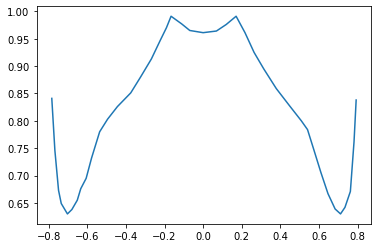

In [22]:
plt.figure()
plt.plot(wavelength[:,0], wavelength[:,1])

In [23]:

t1 = wavelength2[:21,0]*1/np.abs(wavelength2[0][0])
t2 = wavelength2[21:,0]*1/np.abs(wavelength2[-1][0])
t0 = np.append(t1,t2)

In [24]:
wavelength2[:,1] = wavelength2[:,1]*2*(dp_Si/dp_W)*(theta_c_W/theta_c_Si) ## scale to our crystal, and lambda/2 -> lambda
wavelength2[:,0] = t0

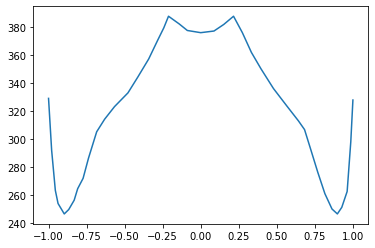

In [25]:
plt.figure()
plt.plot(wavelength2[:,0], wavelength2[:,1])

In [26]:
lambdaFit2=np.polyfit(wavelength2[:,0],wavelength2[:,1],30)
lambdaFit2

array([-3.98792123e+08,  1.42307389e+08,  3.02053838e+09, -1.01918272e+09,
       -1.03510482e+10,  3.27351297e+09,  2.12181728e+10, -6.22570776e+09,
       -2.89767329e+10,  7.79637853e+09,  2.77834049e+10, -6.76264819e+09,
       -1.91952324e+10,  4.16115819e+09,  9.64719608e+09, -1.82898344e+09,
       -3.51474413e+09,  5.70473037e+08,  9.13048673e+08, -1.23709915e+08,
       -1.63610808e+08,  1.79535302e+07,  1.90407129e+07, -1.63208503e+06,
       -1.27662161e+06,  8.21801956e+04,  3.55417229e+04, -1.72498500e+03,
        3.41271392e+00,  7.04040660e+00,  3.75533692e+02])

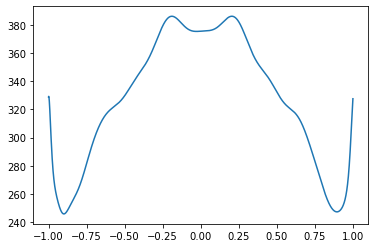

In [27]:
plt.figure()
x = np.linspace(-1, 1, 100000)
y = [np.polyval(lambdaFit2, i) for i in x]
#plt.plot(x, PolyCoefficients(x, lambdaFit2))
plt.plot(x, y)
plt.show()

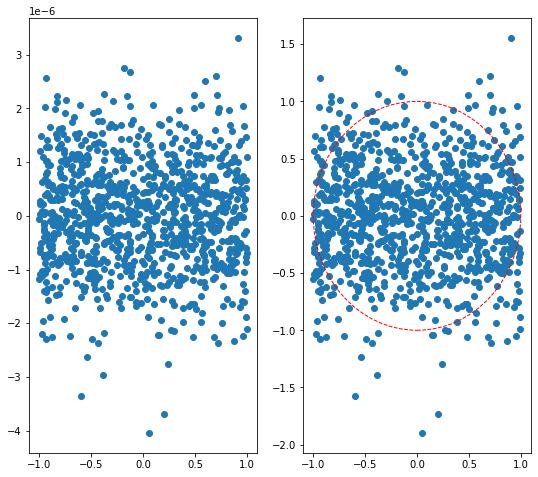

In [45]:

xp0_test = np.random.normal(0, 1e-6, 1000)
x_in_test = np.random.uniform(-1,1,1000)

xp_in_test = xp0_test/theta_c_Si
A_test = np.sqrt(x_in_test**2+xp_in_test**2)
ph_in_test = np.arctan2(xp_in_test,x_in_test)

fig, ax = plt.subplots(1,2, figsize=(9,8))
ax[0].scatter(x_in_test, xp0_test)
ax[1].scatter(x_in_test, xp_in_test)
circle = plt.Circle((0,0), 1, fill=False, color='red', linestyle='dashed')
ax[1].add_patch(circle)

plt.show()

In [29]:
def mylambda(func,xx):
    yy = np.zeros(len(xx))
    for i in np.arange(len(func)):
        yy += func[i]*xx**(len(func)-i-1)
    return yy    

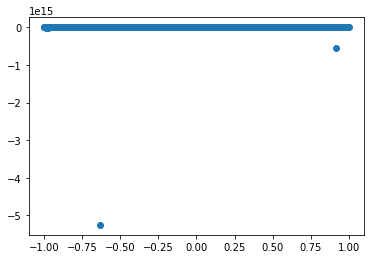

In [30]:
plt.figure()
#plt.plot(x, PolyCoefficients(x, lambdaFit2))
plt.scatter(x_in_test, mylambda(lambdaFit2, A_test))
plt.show()

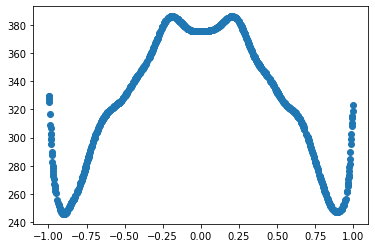

In [31]:
plt.figure()
#plt.plot(x, PolyCoefficients(x, lambdaFit2))
lambdas_test = mylambda(lambdaFit2, x_in_test)
plt.scatter(x_in_test, lambdas_test)
plt.show()

In [32]:
phAdv_test = 1/lambdas_test

In [40]:
phAdv_test = 2*math.pi/lambdas_test

In [41]:
lcry = length_TCCS
theta_bend = bend_TCCS

x_out_test  = A_test*np.sin(ph_in_test + lcry*phAdv_test)*dp_Si/2  
xp_out_test = A_test*np.cos(ph_in_test + lcry*phAdv_test)*theta_c_Si 

In [42]:
x1_test  = x_out_test + x_in_test + lcry*theta_bend*0.5 ### NOTE crosscheck this
xp1_test = x_out_test + theta_bend   


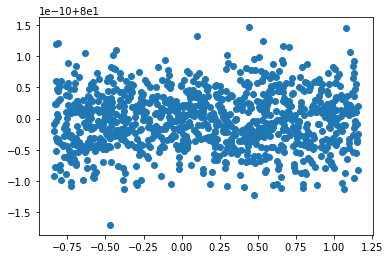

In [43]:
plt.figure()
plt.scatter(x1_test, xp1_test)
plt.show()

Test distributions

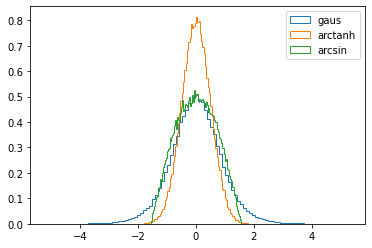

In [46]:
y1 = np.random.normal(0, 0.5, 100000)
y2 = np.random.uniform(-1, 1, 100000)
y3 = [np.arctanh(i) for i in y2]
y4 = [np.arcsin(i) for i in y2]
plt.figure()
plt.hist(y3, bins=100, histtype='step', density=True, label='gaus')
plt.hist(y1, bins=100, histtype='step', density=True, label = 'arctanh')
plt.hist(y4, bins=100, histtype='step', density=True, label = 'arcsin')
plt.legend()
#plt.yscale('log')
plt.show()

## xsuite incriminated code

In [ ]:
%cpp
//if they can channel: 2 options
if (RandomUniform_generate(part) <= Chann) { //option 1:channeling
    double TLdech1 = (const_dech*pc)*pow((1.-1./ratio),2.); //Updated calculate typical dech. length(m)

    if(RandomUniform_generate(part) <= N_atom) {
        TLdech1 = ((const_dech/2.0e2)*pc)*pow((1.-1./ratio),2.);  //Updated dechanneling length (m)      
    }
    double Dechan = RandomExponential_generate(part); //Probability of dechanneling
    double Ldech  = TLdech1*Dechan;   //Actual dechan. length

    //careful: the dechanneling lentgh is along the trajectory
    //of the particle -not along the longitudinal coordinate...
    if (Ldech < L_chan) {
        iProc = proc_DC;
        double Dxp   = Ldech/r; //Change angle from channeling [mrad]
        double Sdech = Ldech*cos(cry_miscut + 0.5*Dxp);
        x  = x  + Ldech*(sin(0.5*Dxp+cry_miscut)); //Trajectory at channeling exit
        xp    = xp + Dxp + (2*(RandomUniform_generate(part)-0.5))*xpcrit;
        y     = y  + yp * Sdech;

        dest = calcionloss_cry(part,Ldech,dest,betar,bgr,gammar,tmax,plen,
                            exenergy,zatom,rho,anuc);
        pc = pc - 0.5*dest*Ldech; //Energy loss to ionization while in CH [GeV]
        x  = x  + (0.5*(s_length-Sdech))*xp;
        y  = y  + (0.5*(s_length-Sdech))*yp;

        dest = calcionloss_cry(part,s_length-Sdech,dest,betar,bgr,gammar,tmax,plen,exenergy,zatom,rho,anuc);

        double* result_am = moveam(rng,part,nam,s_length-Sdech,dest,dlri,xp,yp,pc,anuc,zatom,emr,hcut,bnref,csref0,csref1,csref5,collnt,iProc);
        xp = result_am[0];
        yp = result_am[1];
        pc = result_am[2];
        iProc = result_am[3];
        free(result_am);

        x = x + (0.5*(s_length-Sdech))*xp;
        y = y + (0.5*(s_length-Sdech))*yp;
    } else {
        iProc = proc_CH;
        double xpin  = xp;
        double ypin  = yp;

        //check if a nuclear interaction happen while in CH
        double* result_ch = movech(rng,part,nam,L_chan,x,xp,yp,pc,cry_rcurv,Rcrit,rho,anuc,zatom,emr,hcut,bnref,
                        csref0,csref1,csref5,eUm,collnt,iProc);
        x = result_ch[0];
        xp = result_ch[1];
        yp = result_ch[2];
        pc = result_ch[3];
        iProc = result_ch[4];
        free(result_ch);

        if (iProc != proc_CH) {
            //if an nuclear interaction happened, move until the middle with initial xp,yp:
            //propagate until the "crystal exit" with the new xp,yp accordingly with the rest
            //of the code in "thin lens approx"
            x = x + (0.5*L_chan)*xpin;
            y = y + (0.5*L_chan)*ypin;
            x = x + (0.5*L_chan)*xp;
            y = y + (0.5*L_chan)*yp;

            dest = calcionloss_cry(part,length,dest,betar,bgr,gammar,tmax,plen,
                                exenergy,zatom,rho,anuc);
            pc = pc - dest*length; //energy loss to ionization [GeV]
        } else {
            double Dxp = tdefl + (0.5*RandomNormal_generate(part))*xpcrit; //Change angle[rad]
            
            xp  = Dxp;
            x = x + L_chan*(sin(0.5*Dxp)); //Trajectory at channeling exit
            y   = y + s_length * yp;

            dest = calcionloss_cry(part,length,dest,betar,bgr,gammar,tmax,plen,exenergy,zatom,rho,anuc);
            pc = pc - (0.5*dest)*length; //energy loss to ionization [GeV]     
        } 
    }

In [ ]:
    #------------------------ XSUITE ----------------------------------------------
    pot_Si_xsuite = 21.34
    dp_Si_xsuite = 0.96e-7           # 1.92e-10

    xpcrit0_xsuite = np.sqrt((2.0e-9*pot_Si_xsuite)/p0c_ft)    # Critical angle (rad) for straight crystals
    Rcrit_xsuite   = (p0c_ft/(2.0e-6*pot_Si_xsuite))*dp_Si_xsuite     # Critical curvature radius [m]

    # If R>Rcritical=>no channeling is possible (ratio<1)

    #ratio  = bend_TCCS / Rcrit
    xpcrit_xsuite = ( xpcrit0_xsuite * (bend_TCCS - Rcrit_xsuite) ) / bend_TCCS      # Critical angle for curved crystal
    #print(xpcrit_xsuite)                   # theta_c_Si = 1.5e-6, 
    #------------------------ XSUITE ----------------------------------------------